In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')

train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
print(train.isnull().sum(),
     test.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64 employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


# Analyzing Data

In [4]:
def stack_bar(t,s):
    j = train.groupby(t)[s].value_counts().unstack()
#     print(j)
    j.plot.bar(stacked=True)

In [5]:
train.columns = ['id', 'dept','reg','edu','gen','rec','not','age','rat','los','kpi','won','ats','pro']
test.columns = ['id', 'dept','reg','edu','gen','rec','not','age','rat','los','kpi','won','ats']

train.head()

,id,dept,reg,edu,gen,rec,not,age,rat,los,kpi,won,ats,pro
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
print(train.dept.value_counts(),
     train.reg.value_counts(),
     train.edu.value_counts(),
     train.gen.value_counts(),    
     train.rec.value_counts())

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: dept, dtype: int64 region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: reg, dtype: int64 Bachelor's          36669
Master's & above    14925
Below Seco

In [7]:
from sklearn.preprocessing import LabelEncoder

train['dept'] = LabelEncoder().fit_transform(train['dept'])
train['reg'] = LabelEncoder().fit_transform(train['reg'])
# train['edu'] = LabelEncoder().fit_transform(train['edu'])
train['gen'] = LabelEncoder().fit_transform(train['gen'])
train['rec'] = LabelEncoder().fit_transform(train['rec'])

train.edu.replace({"Below Secondary" : 0, "Master's & above" : 2, "Bachelor's" : 1}, inplace=True)

test['dept'] = LabelEncoder().fit_transform(test['dept'])
test['reg'] = LabelEncoder().fit_transform(test['reg'])
# train['edu'] = LabelEncoder().fit_transform(train['edu'])
test['gen'] = LabelEncoder().fit_transform(test['gen'])
test['rec'] = LabelEncoder().fit_transform(test['rec'])

test.edu.replace({"Below Secondary" : 0, "Master's & above" : 2, "Bachelor's" : 1}, inplace=True)

print(train.dept.value_counts(),
     train.reg.value_counts(),
     train.edu.value_counts(),
     train.gen.value_counts(),    
     train.rec.value_counts())

7    16840
4    11348
8     7138
5     7138
0     5352
1     2536
2     2418
3     1039
6      999
Name: dept, dtype: int64 11    12343
14     6428
31     4843
6      2808
4      2648
18     2260
24     1935
28     1703
19     1659
7      1465
20     1318
2      1315
15     1175
21      994
25      945
10      874
12      850
5       827
17      819
8       796
29      766
30      690
23      657
32      655
1       648
0       610
16      508
3       500
33      420
13      411
22      346
27      292
26      269
9        31
Name: reg, dtype: int64 1.0    36669
2.0    14925
0.0      805
Name: edu, dtype: int64 1    38496
0    16312
Name: gen, dtype: int64 0    30446
2    23220
1     1142
Name: rec, dtype: int64


In [8]:
train.head()

,id,dept,reg,edu,gen,rec,not,age,rat,los,kpi,won,ats,pro
0,65438,7,31,2.0,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,1.0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,1.0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,1.0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,1.0,1,0,1,45,3.0,2,0,0,73,0


## dept

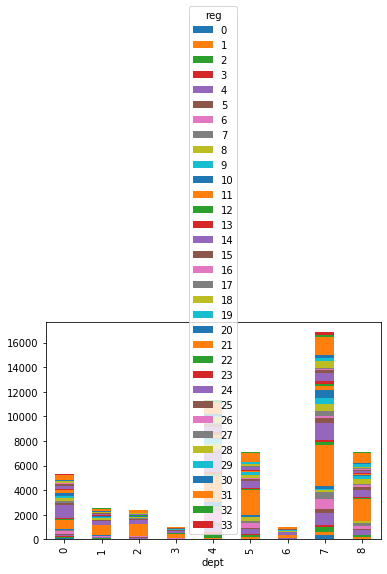

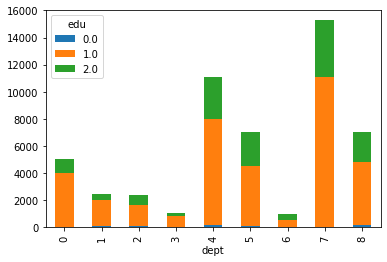

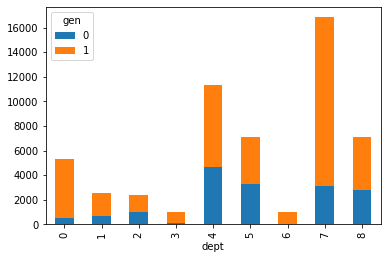

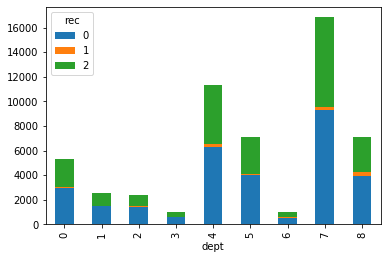

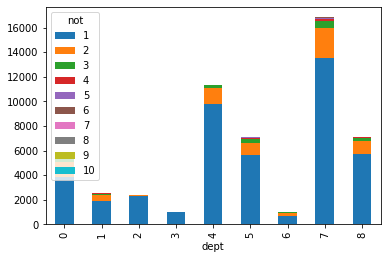

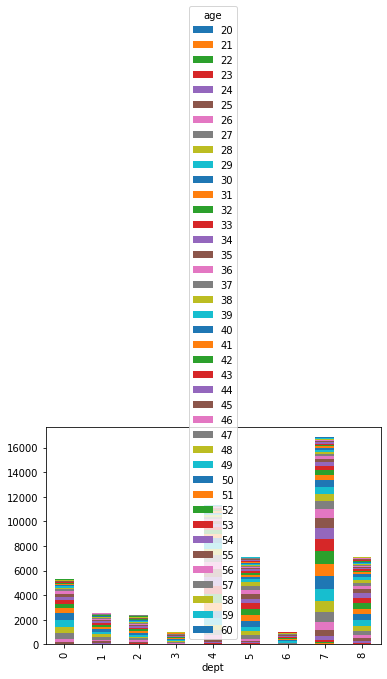

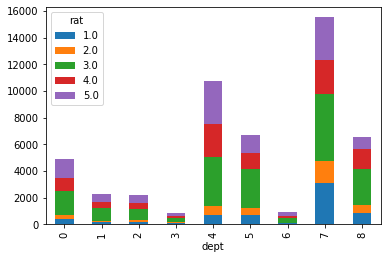

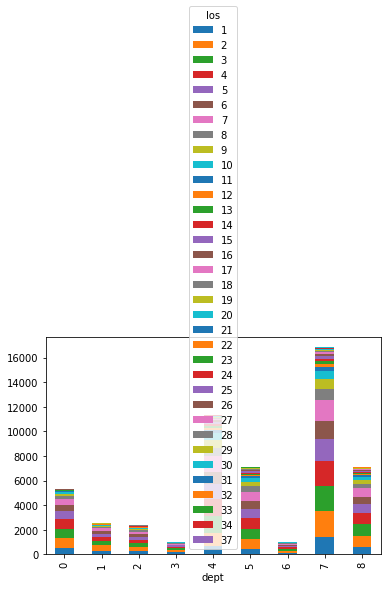

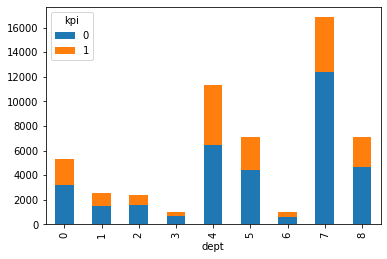

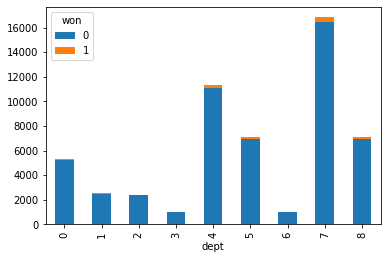

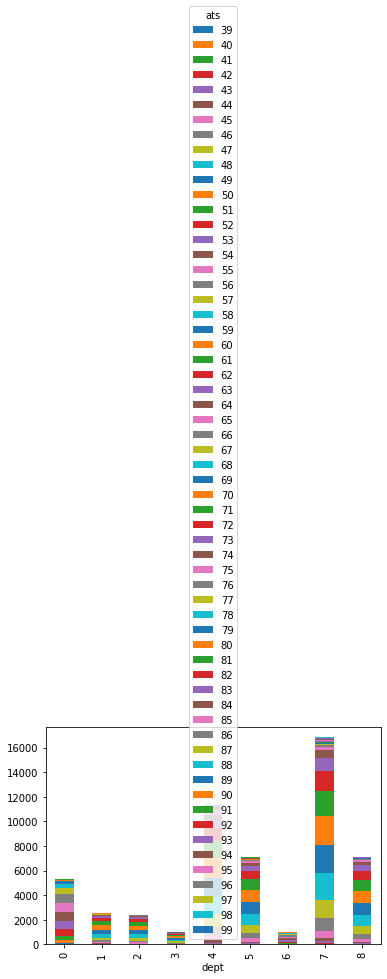

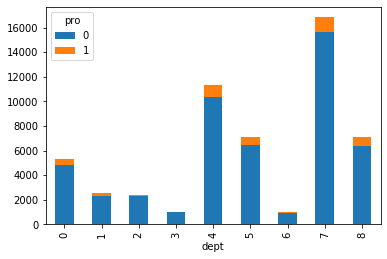

In [9]:
stack_bar('dept','reg')
stack_bar('dept','edu')
stack_bar('dept','gen')
stack_bar('dept','rec')
stack_bar('dept','not')
stack_bar('dept','age')
stack_bar('dept','rat')
stack_bar('dept','los')
stack_bar('dept','kpi')
stack_bar('dept','won')
stack_bar('dept','ats')
stack_bar('dept','pro')

 no. of employee education wise are 1 > 2 > 0

except for dept 2,4,5 all have males > females

Least of the employees are recruited from 1

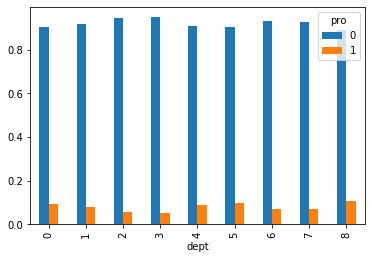

In [10]:
dept = train.groupby("dept")["pro"].value_counts().unstack()

dept = dept.apply(lambda x : x / x.sum(), axis = 'columns')

dept.plot.bar()


On an average 10% employee from each department is promoted

## reg

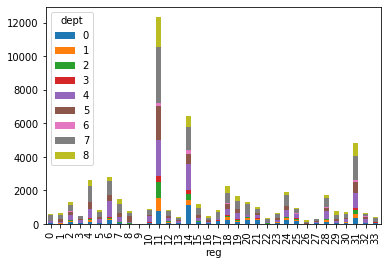

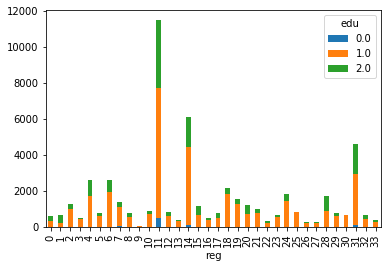

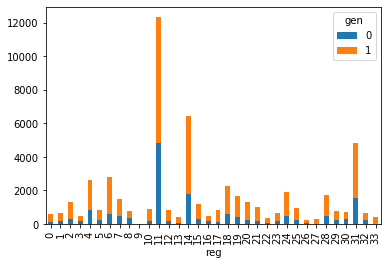

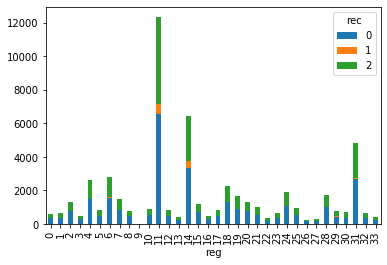

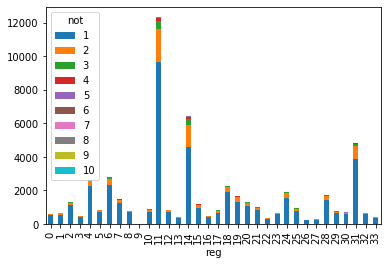

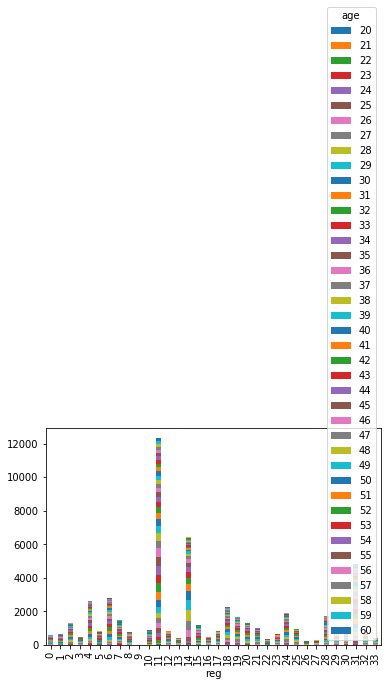

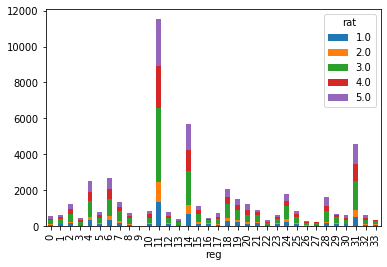

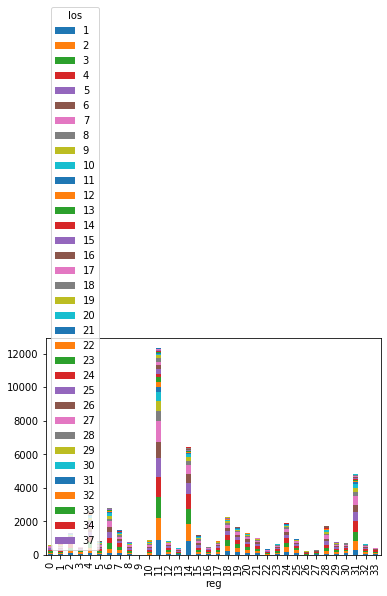

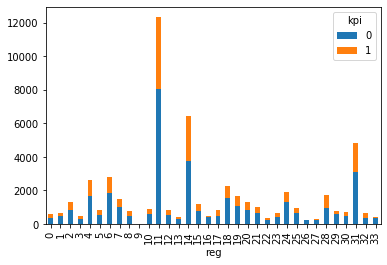

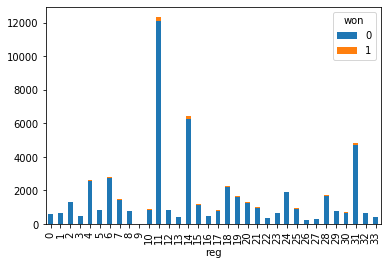

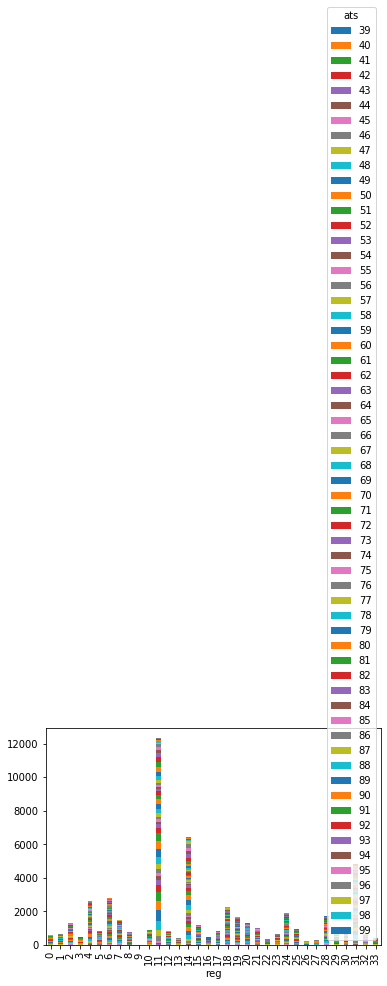

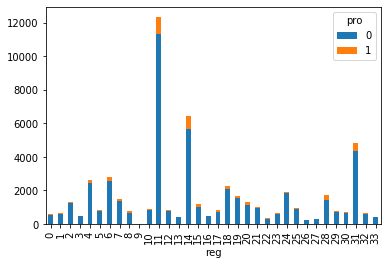

In [11]:
stack_bar('reg','dept')
stack_bar('reg','edu')
stack_bar('reg','gen')
stack_bar('reg','rec')
stack_bar('reg','not')
stack_bar('reg','age')
stack_bar('reg','rat')
stack_bar('reg','los')
stack_bar('reg','kpi')
stack_bar('reg','won')
stack_bar('reg','ats')
stack_bar('reg','pro')

Empolyee with edu = 0 come from region 7,11,14,31

Only Males come from region 33

Only rec=1 come from region 6,11,4,29,31 

## edu

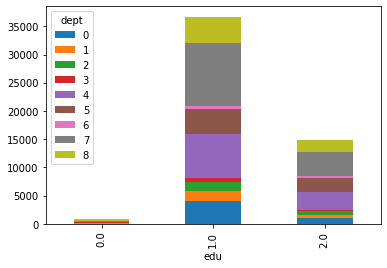

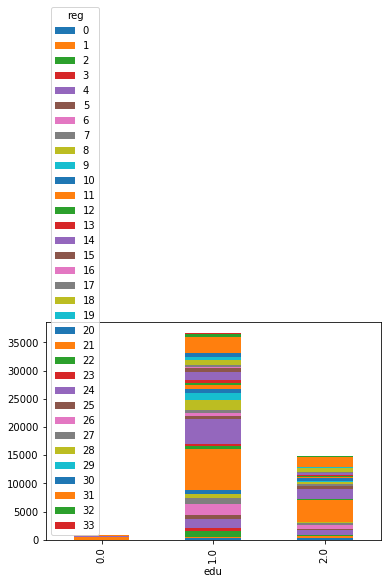

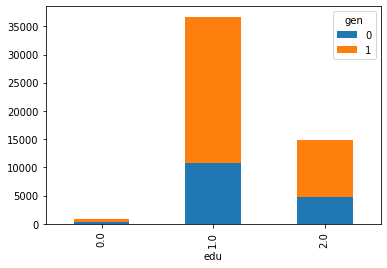

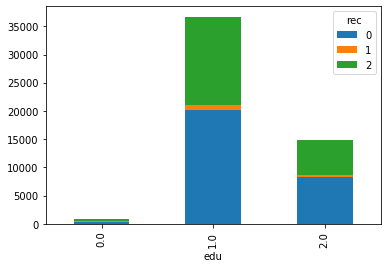

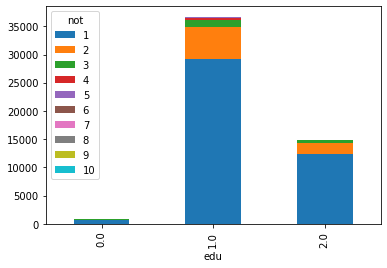

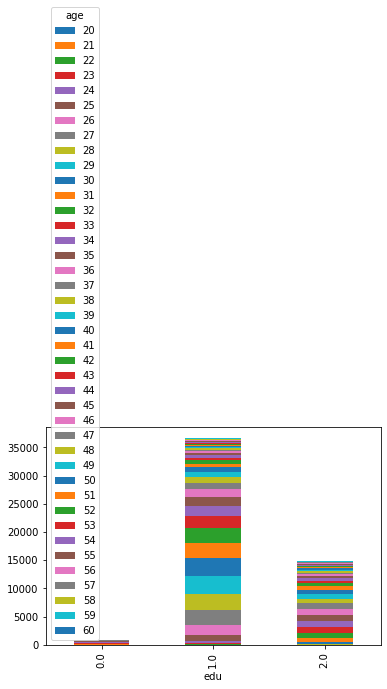

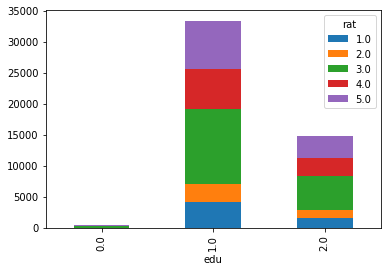

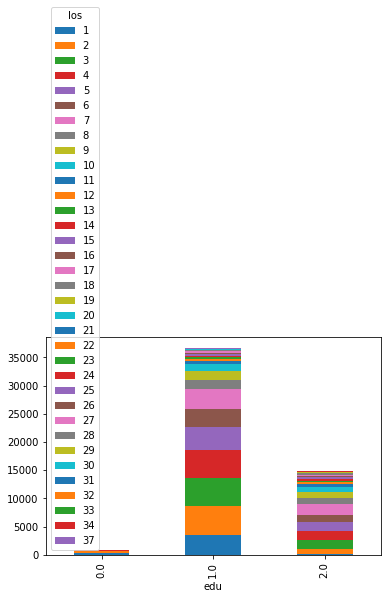

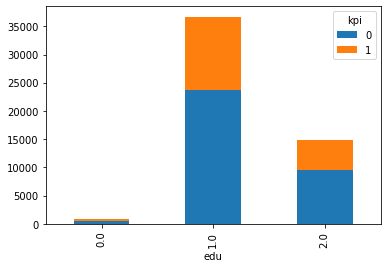

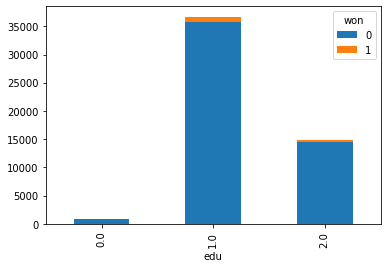

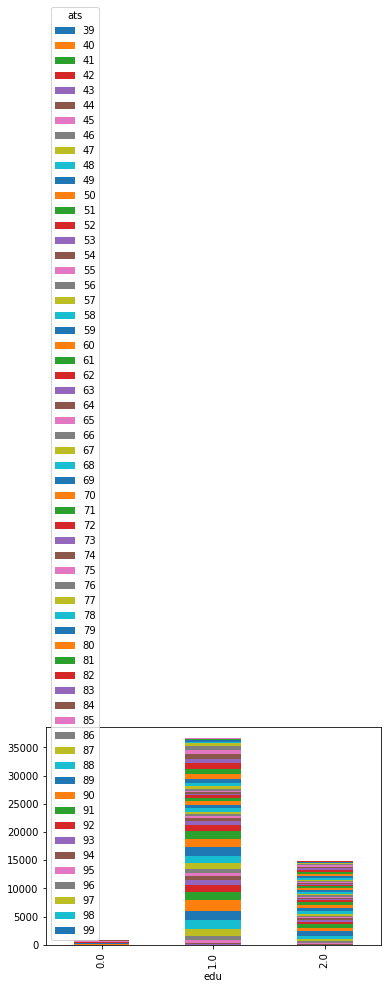

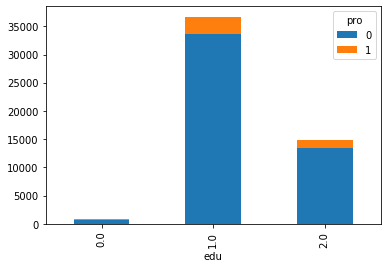

In [12]:
stack_bar('edu','dept')
stack_bar('edu','reg')
stack_bar('edu','gen')
stack_bar('edu','rec')
stack_bar('edu','not')
stack_bar('edu','age')
stack_bar('edu','rat')
stack_bar('edu','los')
stack_bar('edu','kpi')
stack_bar('edu','won')
stack_bar('edu','ats')
stack_bar('edu','pro')

No. of training is <=4 of edu=0 

## gen

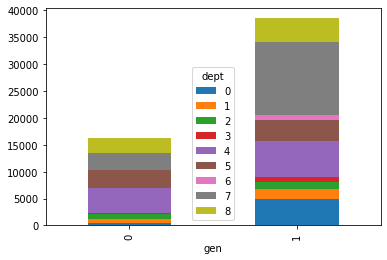

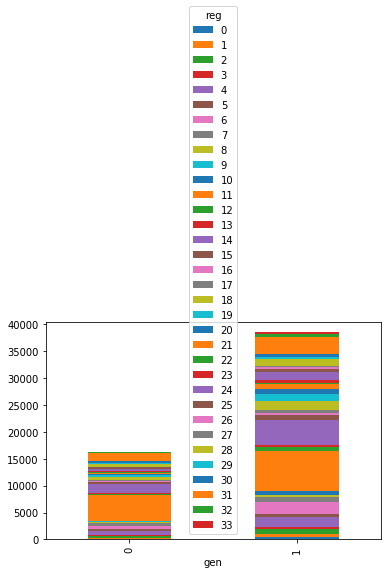

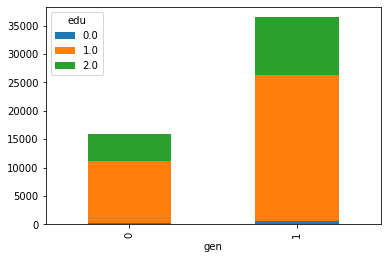

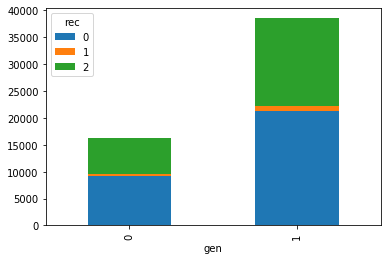

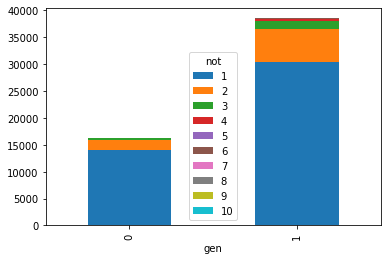

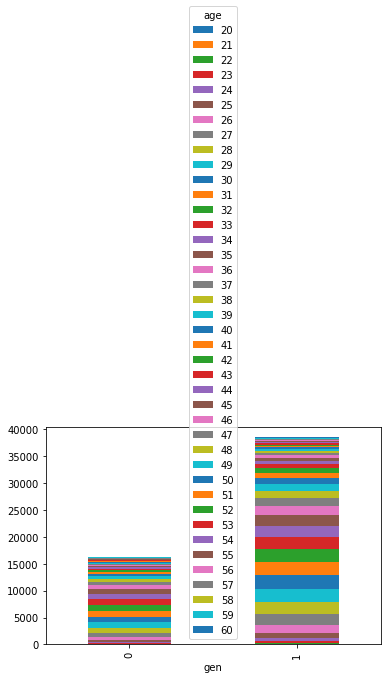

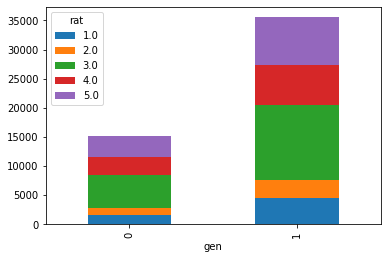

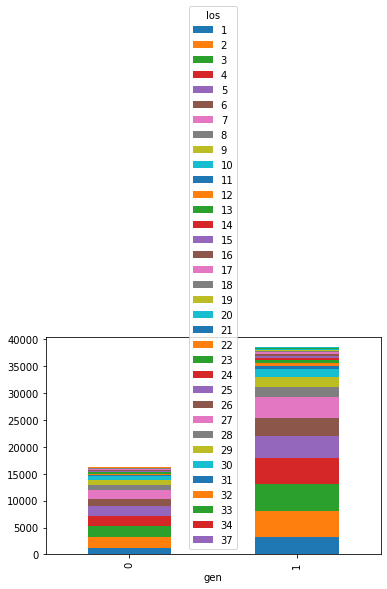

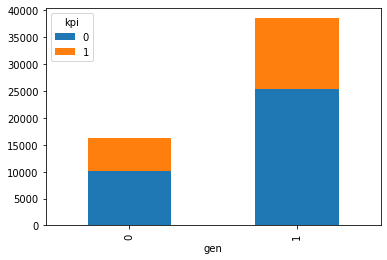

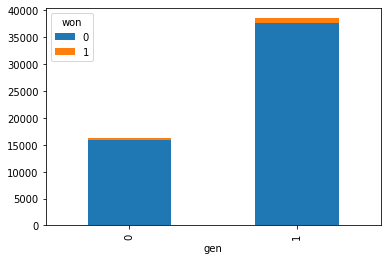

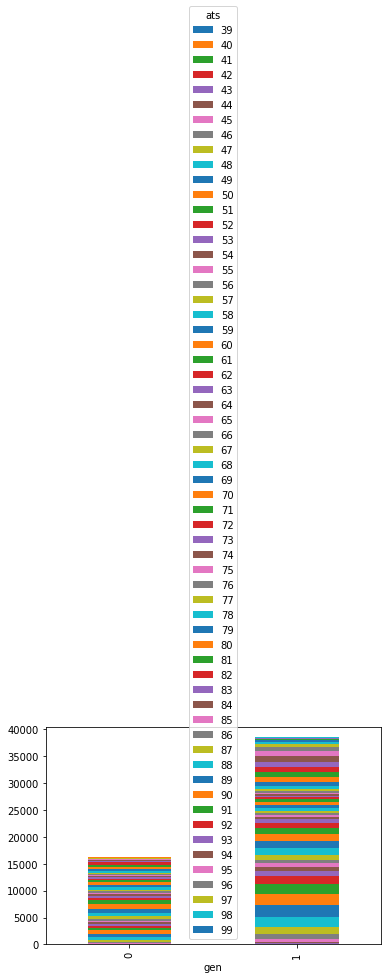

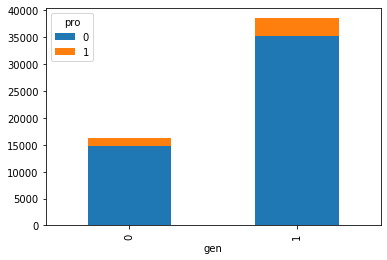

In [13]:
stack_bar('gen','dept')
stack_bar('gen','reg')
stack_bar('gen','edu')
stack_bar('gen','rec')
stack_bar('gen','not')
stack_bar('gen','age')
stack_bar('gen','rat')
stack_bar('gen','los')
stack_bar('gen','kpi')
stack_bar('gen','won')
stack_bar('gen','ats')
stack_bar('gen','pro')

Nothing to conclude

## rec

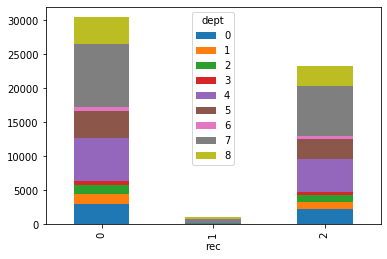

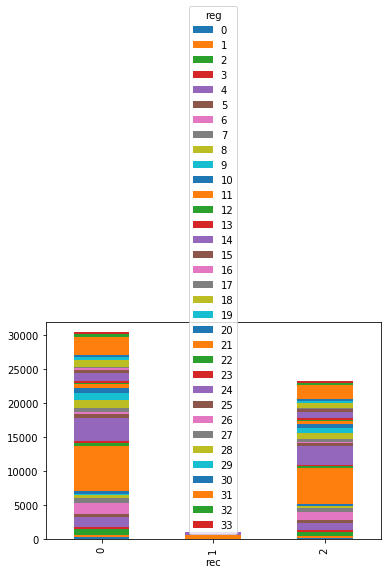

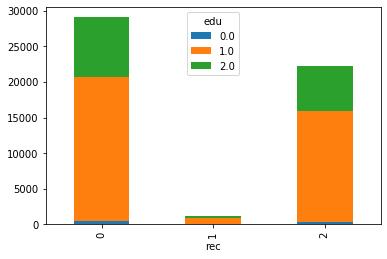

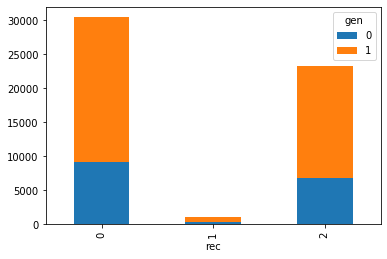

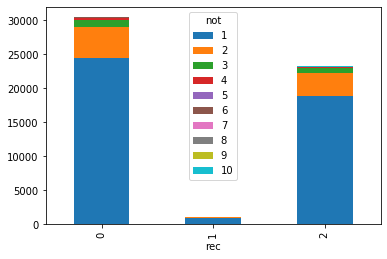

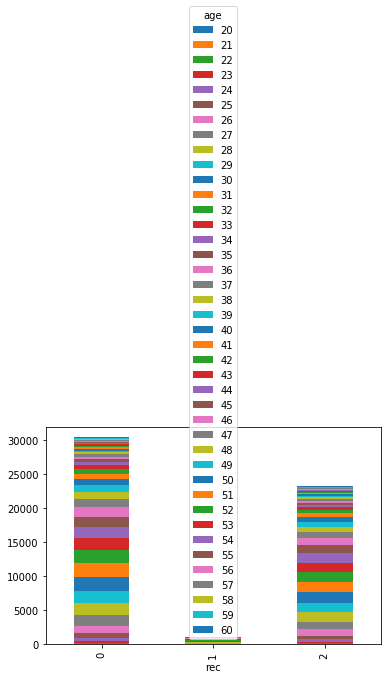

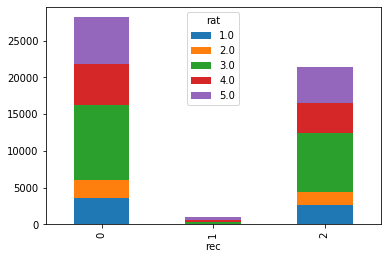

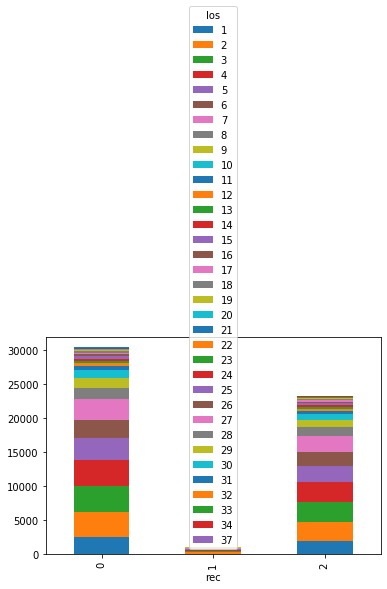

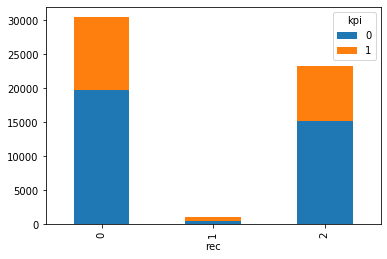

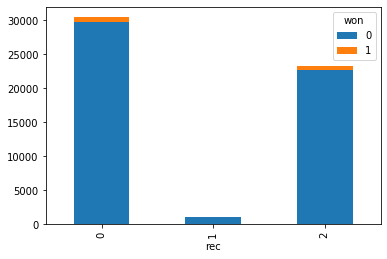

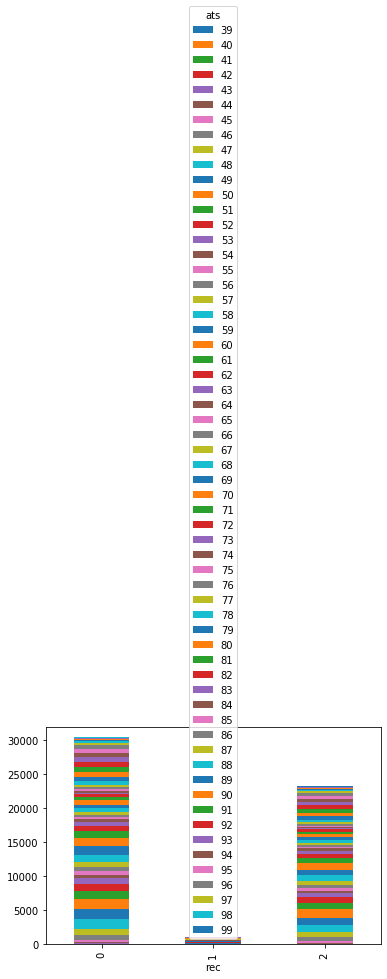

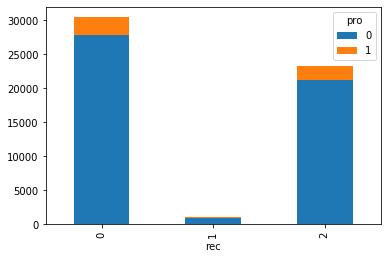

In [14]:
stack_bar('rec','dept')
stack_bar('rec','reg')
stack_bar('rec','edu')
stack_bar('rec','gen')
stack_bar('rec','not')
stack_bar('rec','age')
stack_bar('rec','rat')
stack_bar('rec','los')
stack_bar('rec','kpi')
stack_bar('rec','won')
stack_bar('rec','ats')
stack_bar('rec','pro')

Nothing to conclude

## not

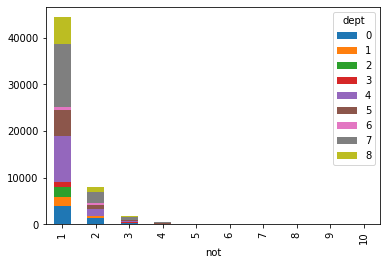

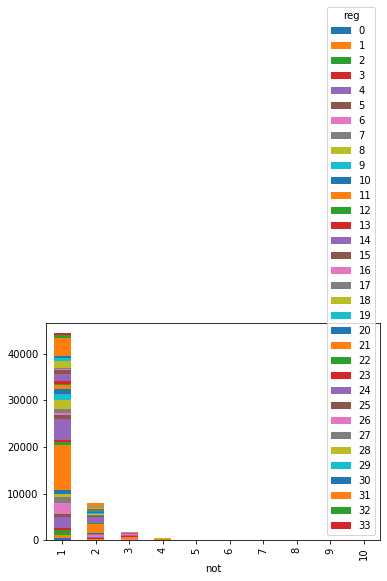

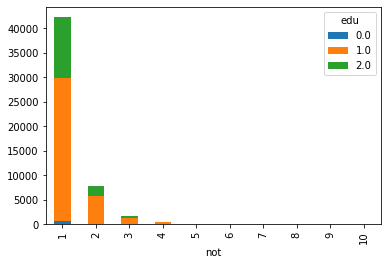

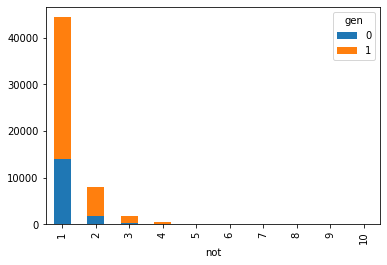

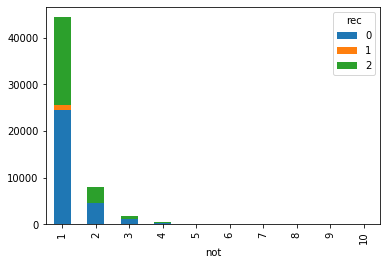

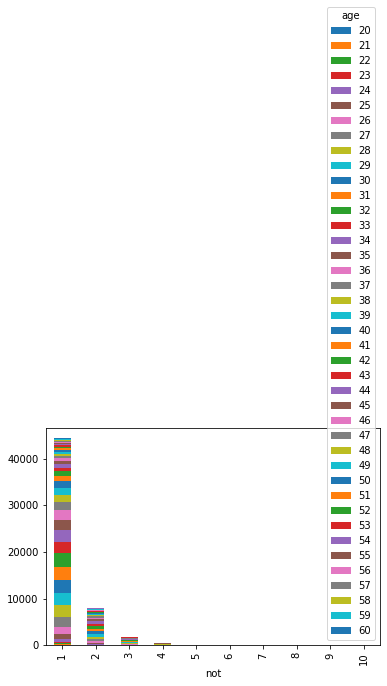

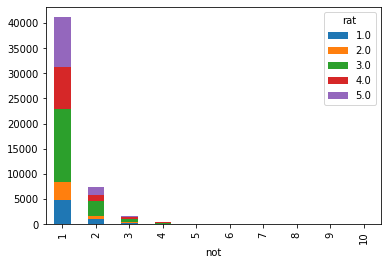

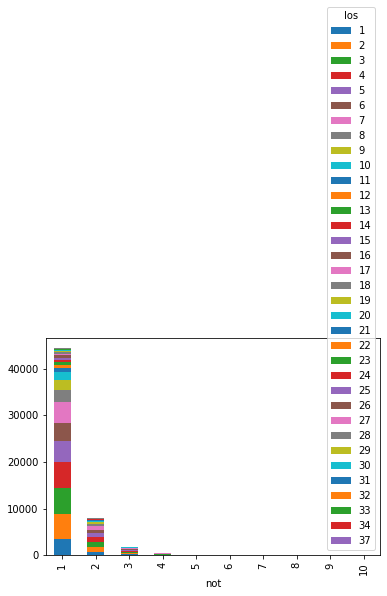

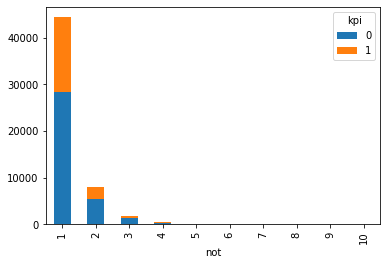

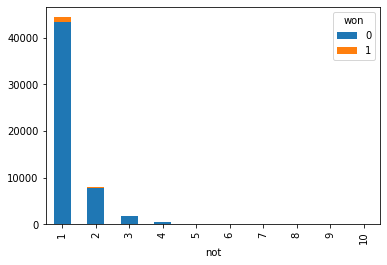

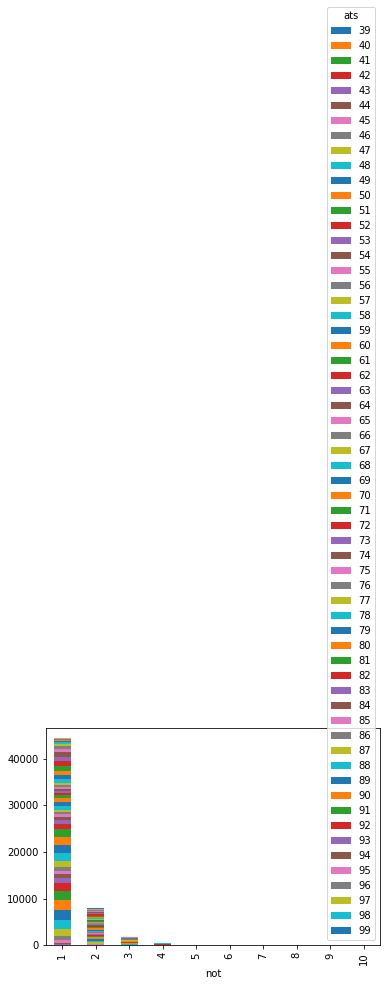

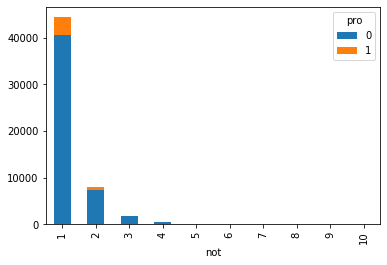

In [15]:
stack_bar('not','dept')
stack_bar('not','reg')
stack_bar('not','edu')
stack_bar('not','gen')
stack_bar('not','rec')
stack_bar('not','age')
stack_bar('not','rat')
stack_bar('not','los')
stack_bar('not','kpi')
stack_bar('not','won')
stack_bar('not','ats')
stack_bar('not','pro')

Males with no. of traning > 6 never promoted

## age

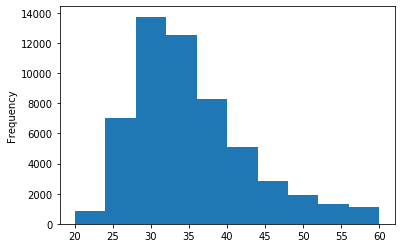

In [16]:
train.age.plot.hist()

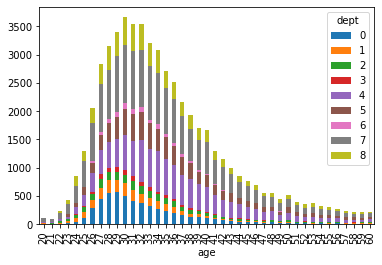

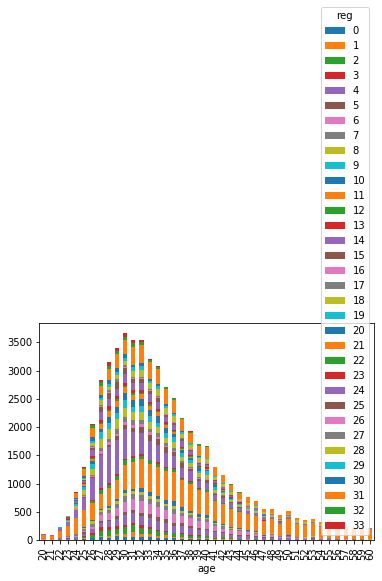

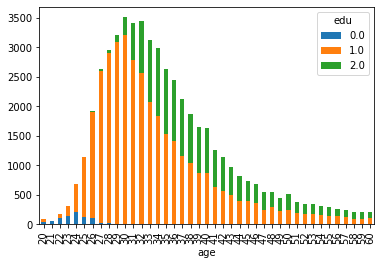

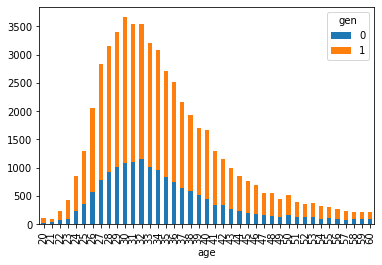

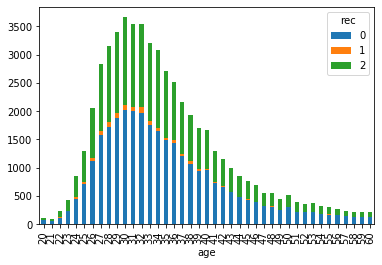

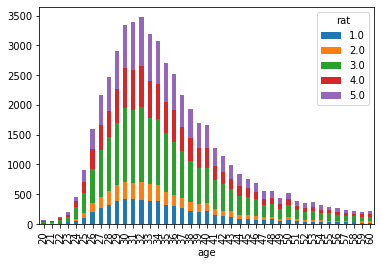

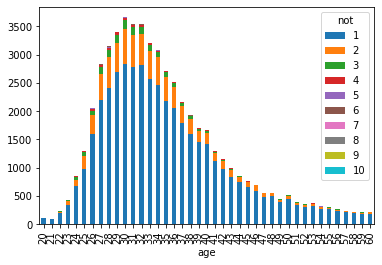

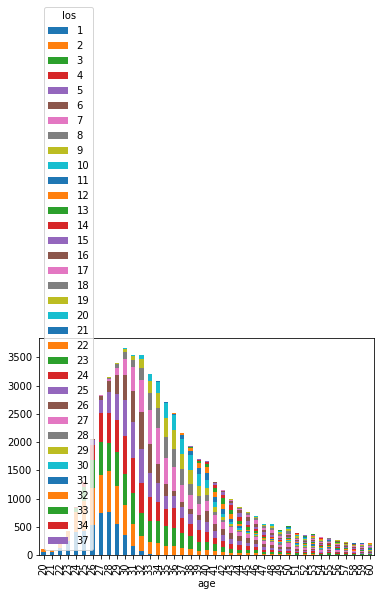

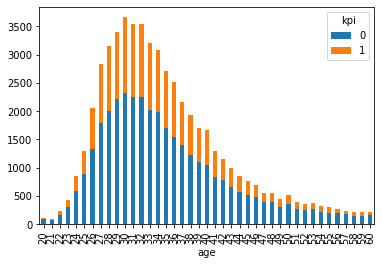

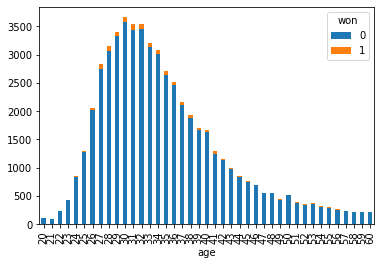

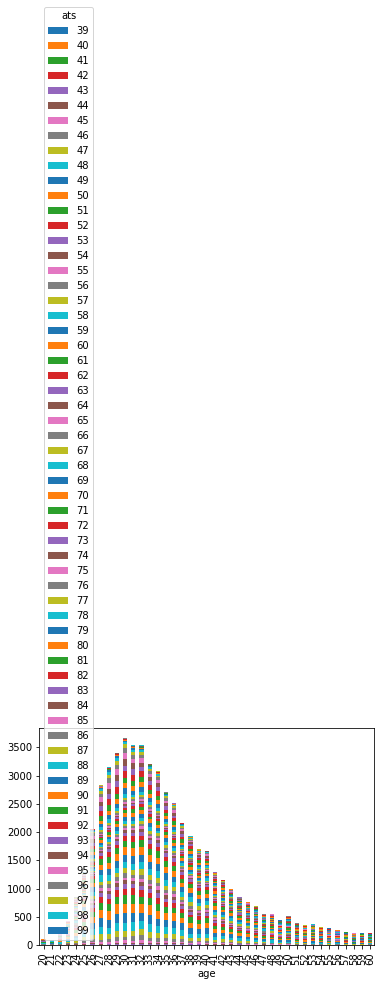

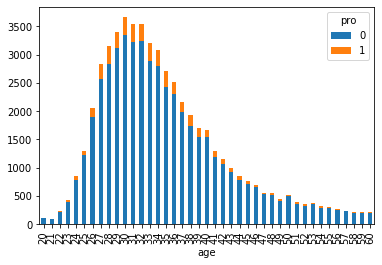

In [17]:
stack_bar('age','dept')
stack_bar('age','reg')
stack_bar('age','edu')
stack_bar('age','gen')
stack_bar('age','rec')
stack_bar('age','rat')
stack_bar('age','not')
stack_bar('age','los')
stack_bar('age','kpi')
stack_bar('age','won')
stack_bar('age','ats')
stack_bar('age','pro')

edu=0 for age<29

edu=2 for age>25



## rat

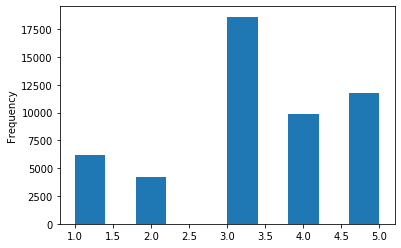

In [18]:
train.rat.plot.hist()

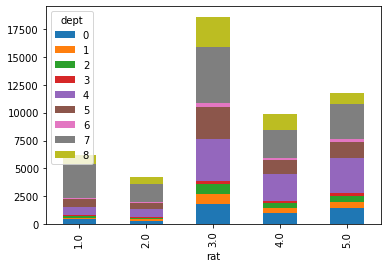

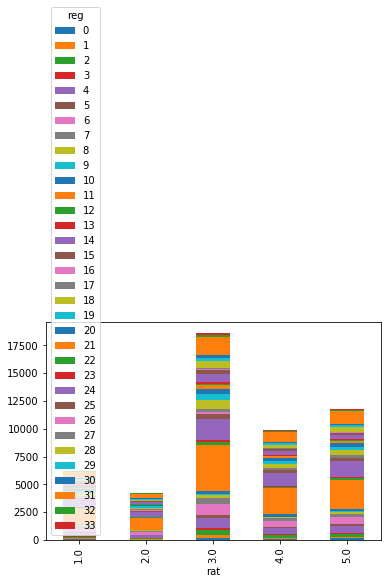

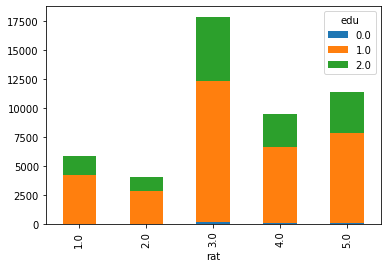

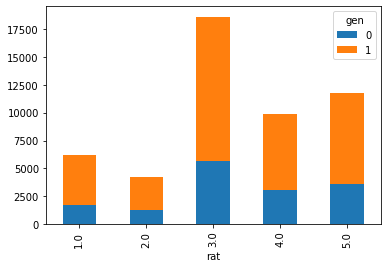

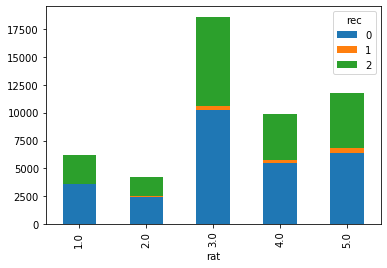

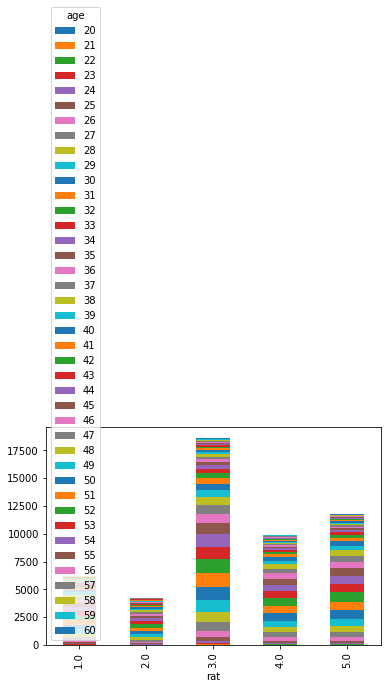

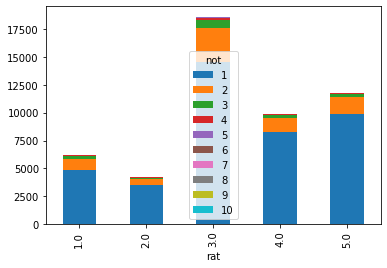

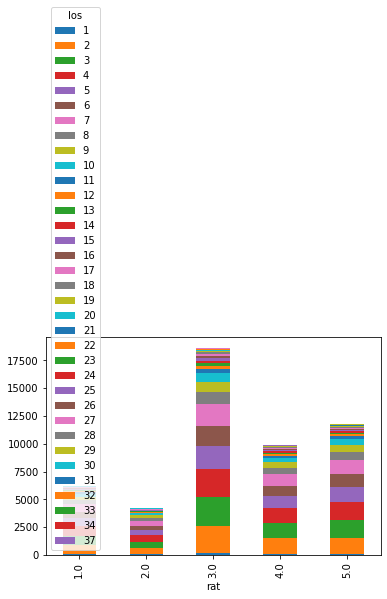

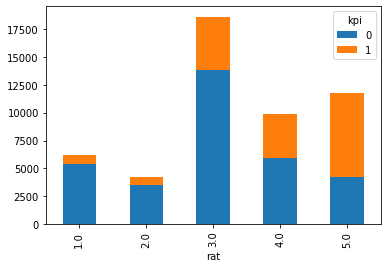

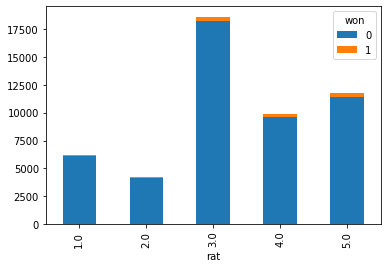

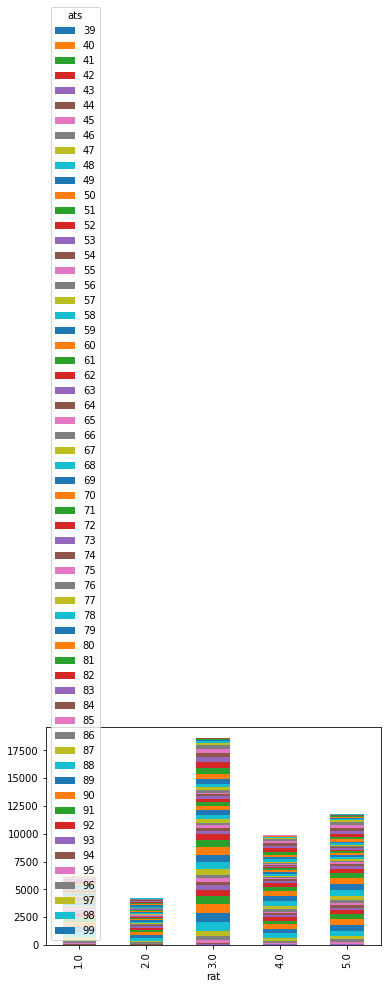

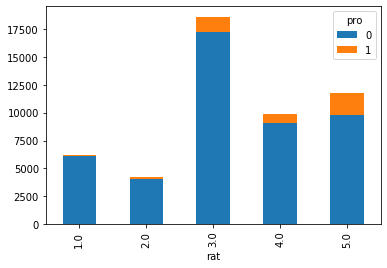

In [19]:
stack_bar('rat','dept')
stack_bar('rat','reg')
stack_bar('rat','edu')
stack_bar('rat','gen')
stack_bar('rat','rec')
stack_bar('rat','age')
stack_bar('rat','not')
stack_bar('rat','los')
stack_bar('rat','kpi')
stack_bar('rat','won')
stack_bar('rat','ats')
stack_bar('rat','pro')

    % of Employee promoted are of rating 5 > 4 > 3 > 2 > 1 !!! (UNEXPECTED)

## los

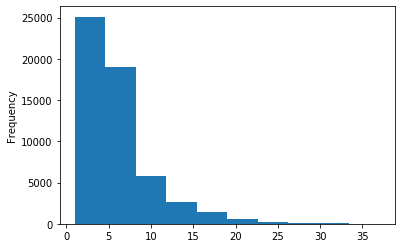

In [20]:
train.los.plot.hist()

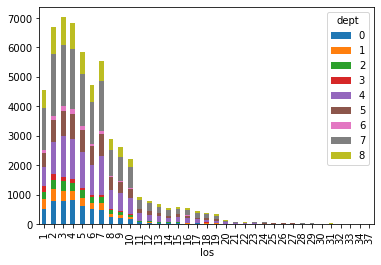

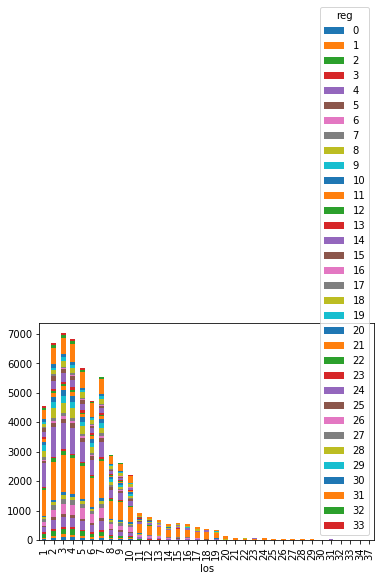

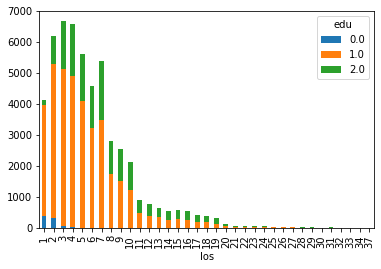

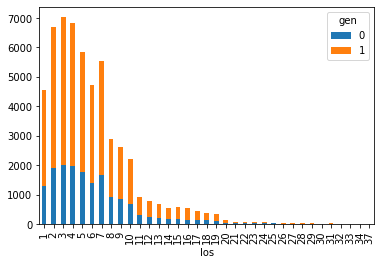

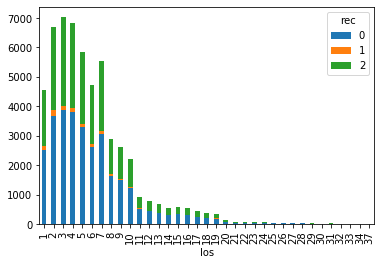

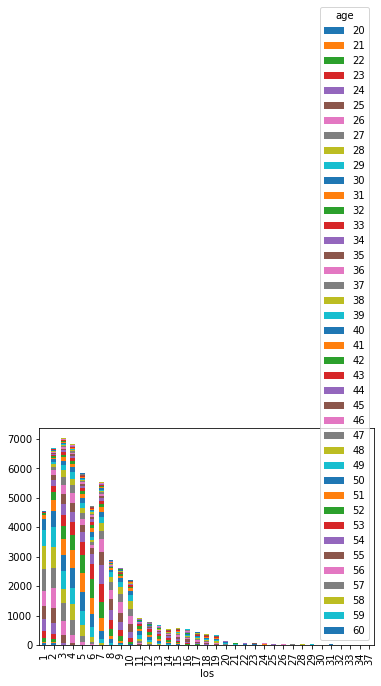

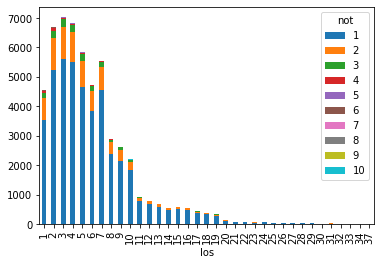

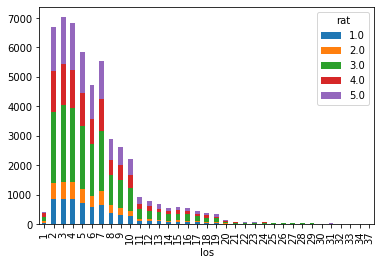

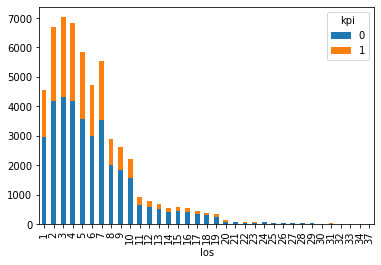

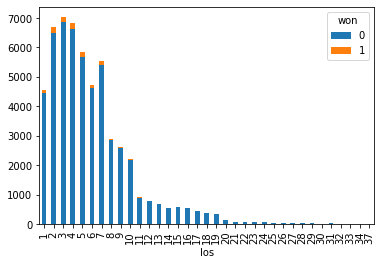

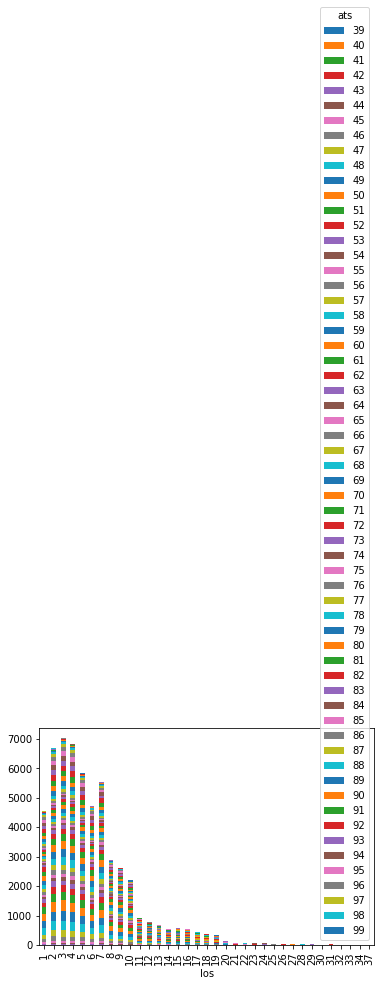

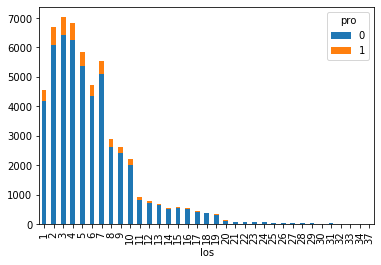

In [21]:
stack_bar('los','dept')
stack_bar('los','reg')
stack_bar('los','edu')
stack_bar('los','gen')
stack_bar('los','rec')
stack_bar('los','age')
stack_bar('los','not')
stack_bar('los','rat')
stack_bar('los','kpi')
stack_bar('los','won')
stack_bar('los','ats')
stack_bar('los','pro')

Length of Service is shortest for employee with edu=0

Length of Service is shortest for employee with rec=1

##  kpi

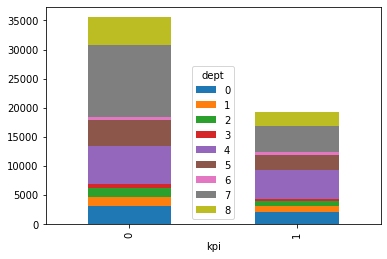

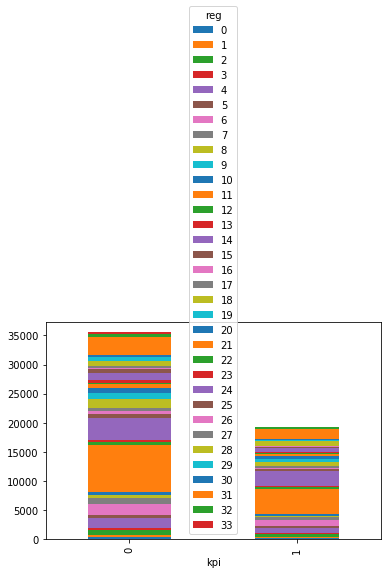

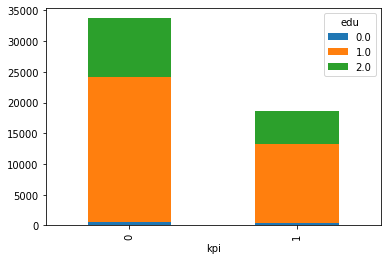

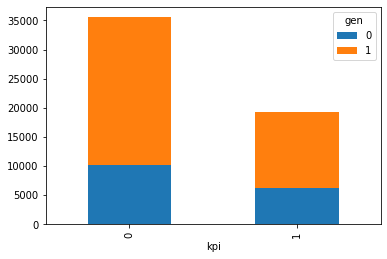

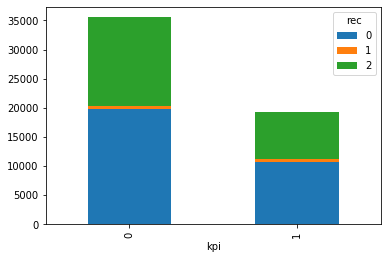

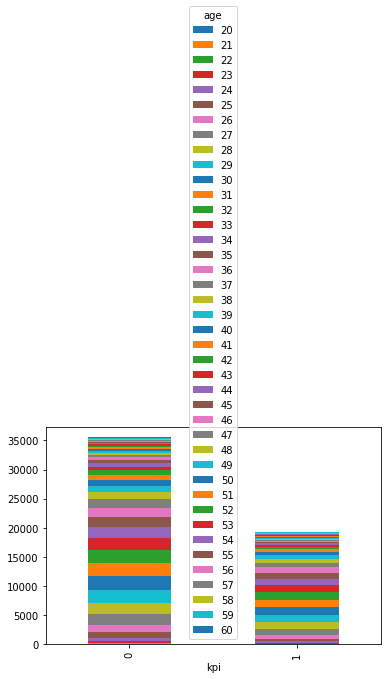

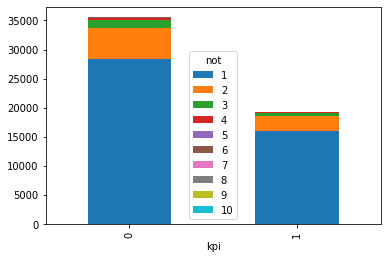

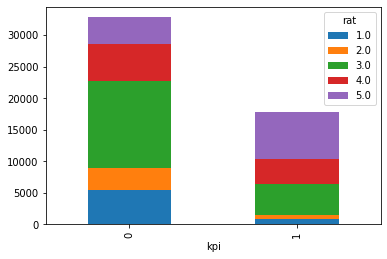

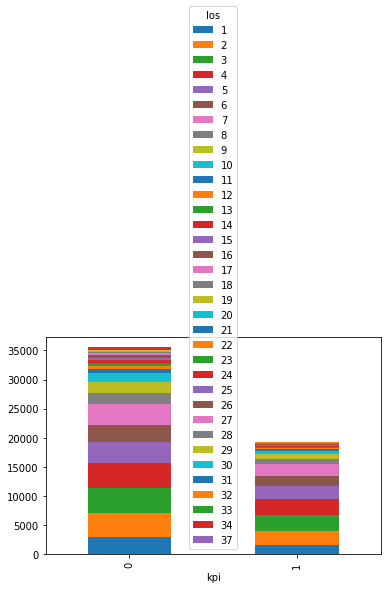

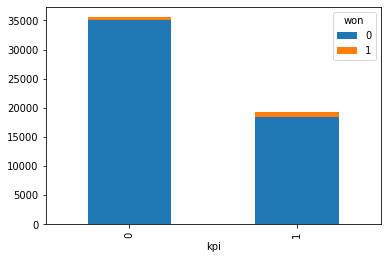

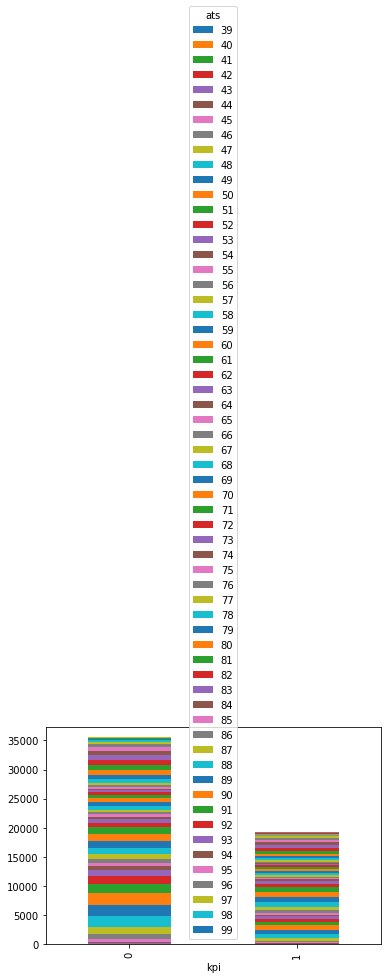

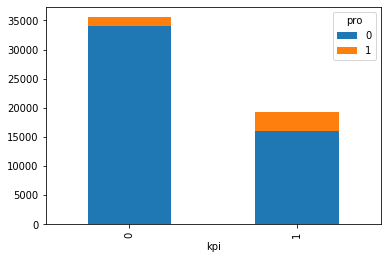

In [22]:
stack_bar('kpi','dept')
stack_bar('kpi','reg')
stack_bar('kpi','edu')
stack_bar('kpi','gen')
stack_bar('kpi','rec')
stack_bar('kpi','age')
stack_bar('kpi','not')
stack_bar('kpi','rat')
stack_bar('kpi','los')
stack_bar('kpi','won')
stack_bar('kpi','ats')
stack_bar('kpi','pro')

Nothing to conclude

## won

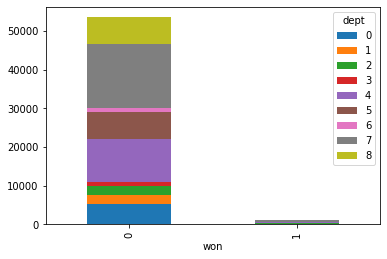

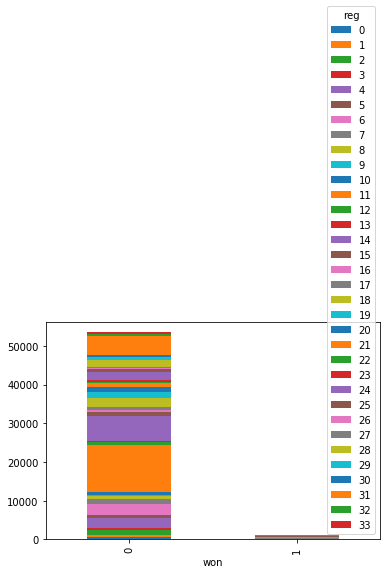

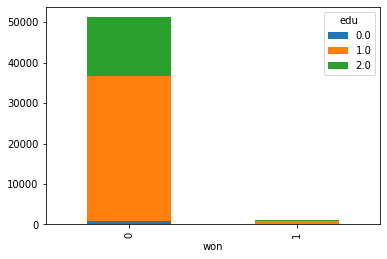

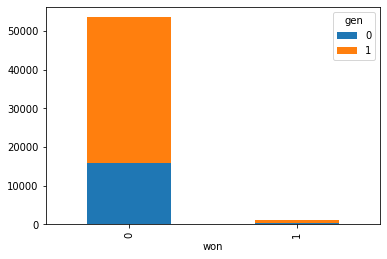

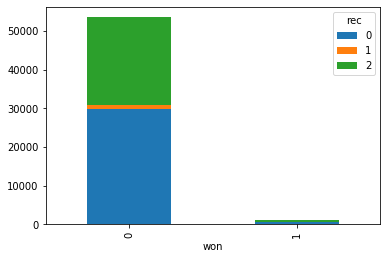

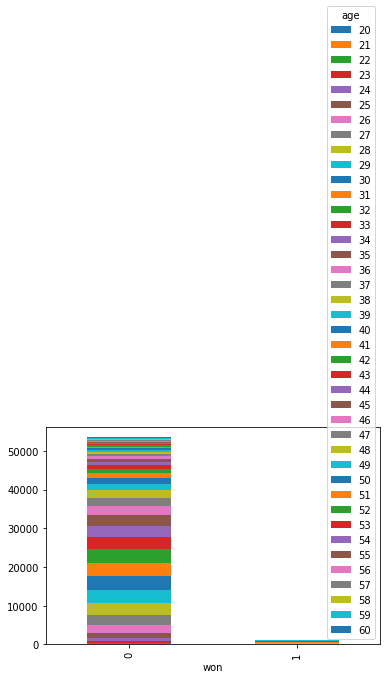

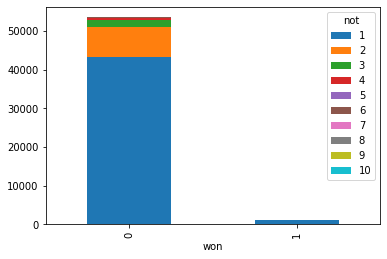

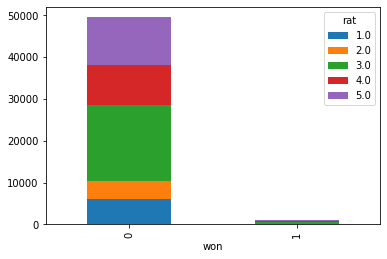

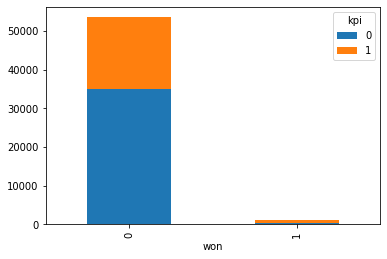

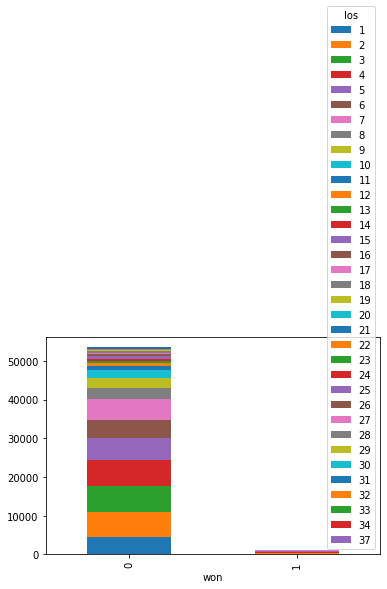

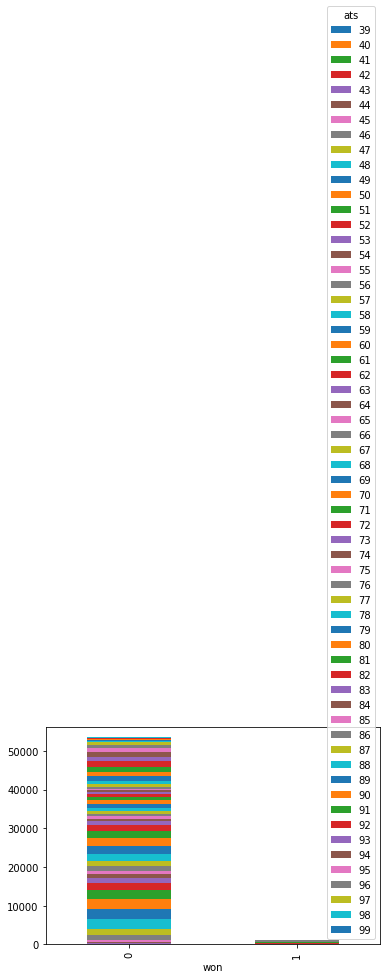

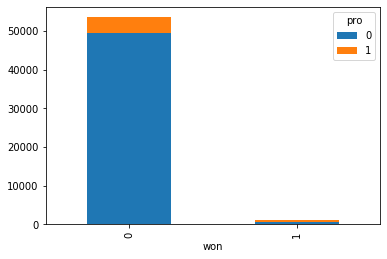

In [23]:
stack_bar('won','dept')
stack_bar('won','reg')
stack_bar('won','edu')
stack_bar('won','gen')
stack_bar('won','rec')
stack_bar('won','age')
stack_bar('won','not')
stack_bar('won','rat')
stack_bar('won','kpi')
stack_bar('won','los')
stack_bar('won','ats')
stack_bar('won','pro')

Nothing to conclude

## ats

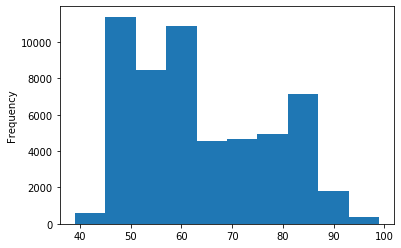

In [24]:
train.ats.plot.hist()

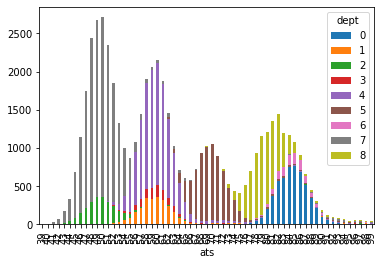

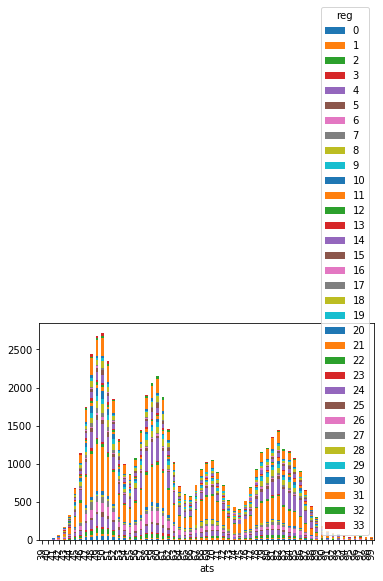

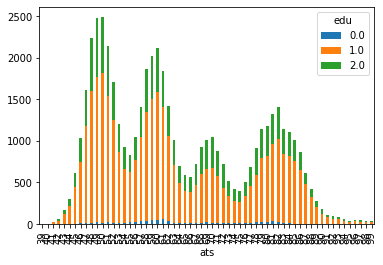

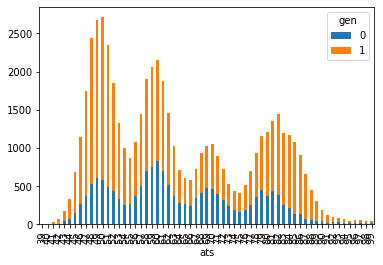

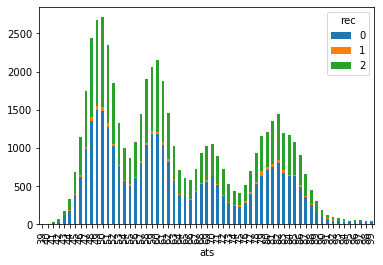

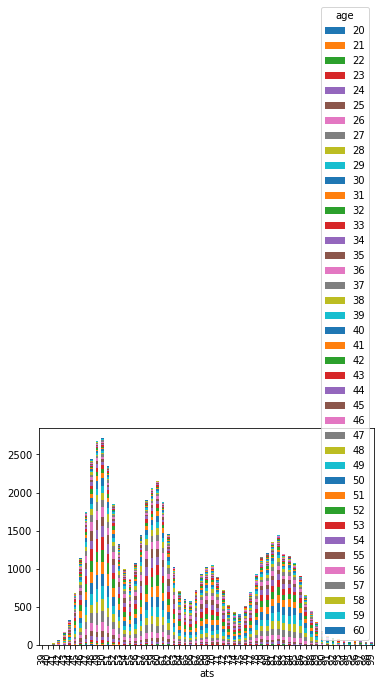

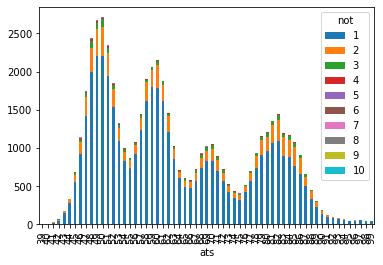

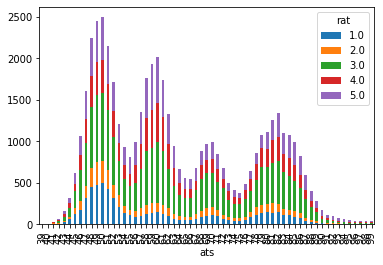

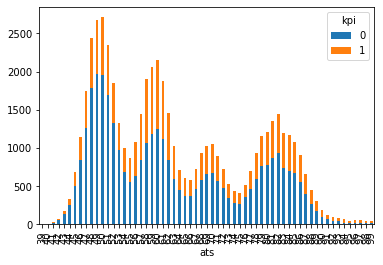

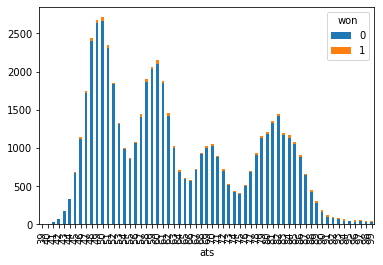

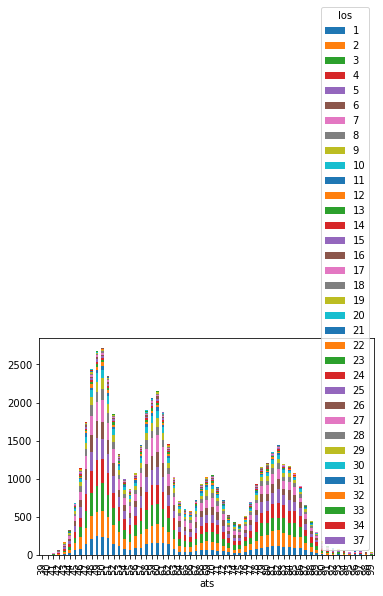

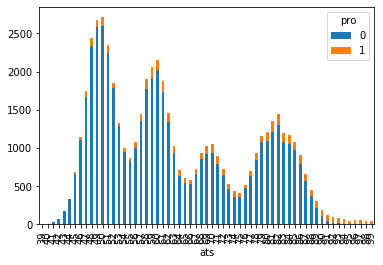

In [25]:
stack_bar('ats','dept')
stack_bar('ats','reg')
stack_bar('ats','edu')
stack_bar('ats','gen')
stack_bar('ats','rec')
stack_bar('ats','age')
stack_bar('ats','not')
stack_bar('ats','rat')
stack_bar('ats','kpi')
stack_bar('ats','won')
stack_bar('ats','los')
stack_bar('ats','pro')

There is NO correlation between "ats" and "age","los" 

Employee with "ats" <= 40 never promoted

##  pro

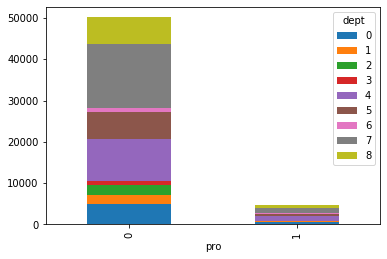

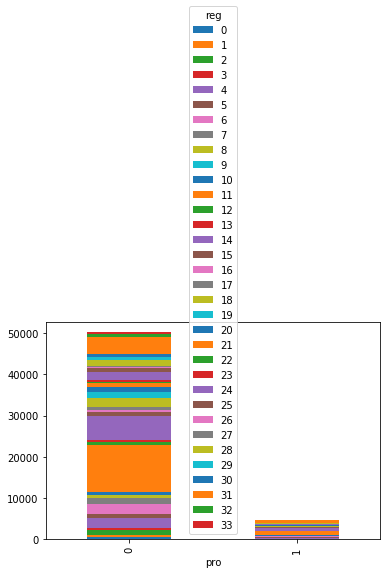

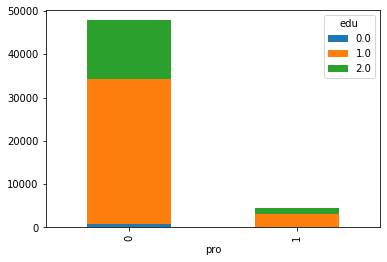

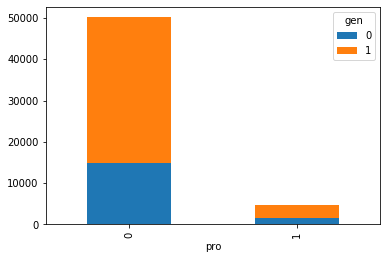

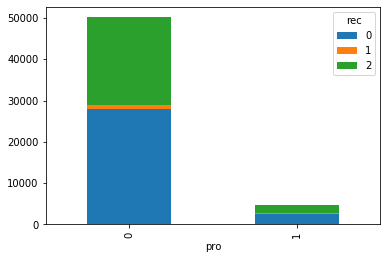

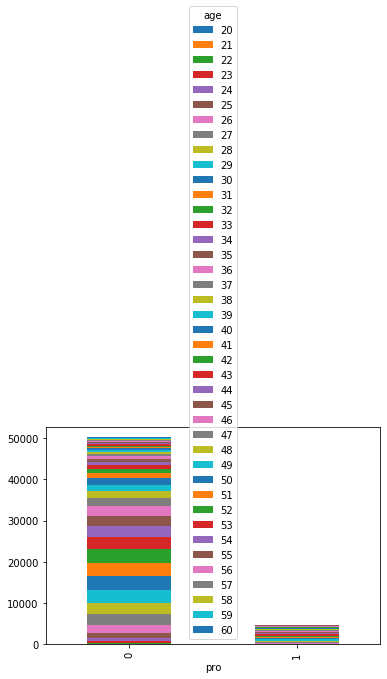

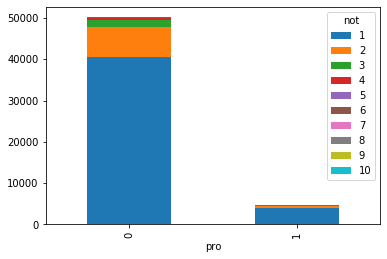

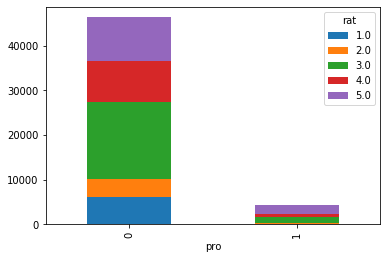

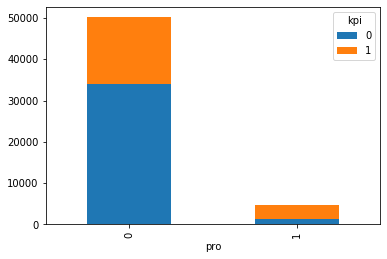

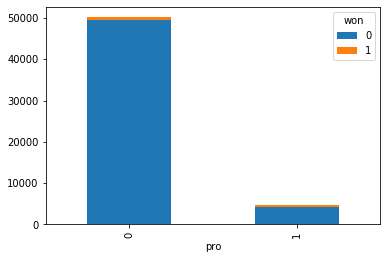

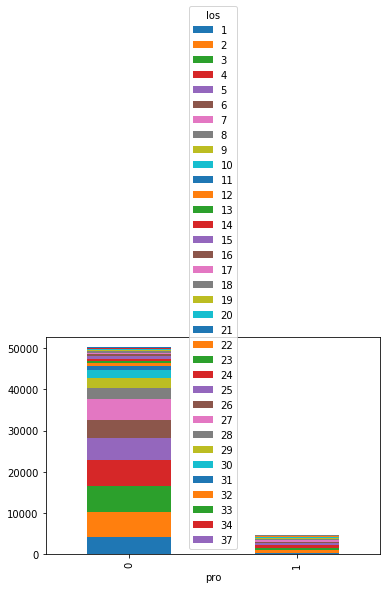

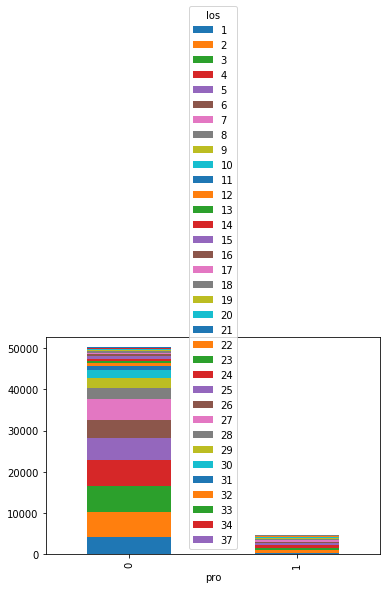

In [26]:
stack_bar('pro','dept')
stack_bar('pro','reg')
stack_bar('pro','edu')
stack_bar('pro','gen')
stack_bar('pro','rec')
stack_bar('pro','age')
stack_bar('pro','not')
stack_bar('pro','rat')
stack_bar('pro','kpi')
stack_bar('pro','won')
stack_bar('pro','los')
stack_bar('pro','los')

Nothing can be concluded

# Conclusion

We will use features = 'dept','edu','gen','rec','reg','not','ats','los','rat','age'

# Data Cleaning

In [27]:
train.columns

Index(['id', 'dept', 'reg', 'edu', 'gen', 'rec', 'not', 'age', 'rat', 'los',
       'kpi', 'won', 'ats', 'pro'],
      dtype='object')

In [28]:
feature = ['id','dept','edu','gen','rec','reg','not','ats','los','rat','age']

train = train[feature + ['pro']]
test = test[feature]

train.head()

,id,dept,edu,gen,rec,reg,not,ats,los,rat,age,pro
0,65438,7,2.0,0,2,31,1,49,8,5.0,35,0
1,65141,4,1.0,1,0,14,1,60,4,5.0,30,0
2,7513,7,1.0,1,2,10,1,50,7,3.0,34,0
3,2542,7,1.0,1,0,15,2,50,10,1.0,39,0
4,48945,8,1.0,1,0,18,1,73,2,3.0,45,0


In [29]:
print(train.ats.describe())
print(test.ats.describe())

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: ats, dtype: float64
count    23490.000000
mean        63.263133
std         13.411750
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: ats, dtype: float64


In [30]:
train['ats'] = pd.cut(train['ats'],[0,45,65,100],labels=[0,1,2])
test['ats'] = pd.cut(test['ats'],[0,45,65,100],labels=[0,1,2])

train.head()

,id,dept,edu,gen,rec,reg,not,ats,los,rat,age,pro
0,65438,7,2.0,0,2,31,1,1,8,5.0,35,0
1,65141,4,1.0,1,0,14,1,1,4,5.0,30,0
2,7513,7,1.0,1,2,10,1,1,7,3.0,34,0
3,2542,7,1.0,1,0,15,2,1,10,1.0,39,0
4,48945,8,1.0,1,0,18,1,2,2,3.0,45,0


In [31]:
print(train.age.describe())
print(test.age.describe())

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64
count    23490.000000
mean        34.782929
std          7.679492
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64


In [32]:
train['age'] = pd.cut(train['age'],[0,30,36,100],labels=[0,1,2])
test['age'] = pd.cut(test['age'],[0,30,36,100],labels=[0,1,2])

train.head()

,id,dept,edu,gen,rec,reg,not,ats,los,rat,age,pro
0,65438,7,2.0,0,2,31,1,1,8,5.0,1,0
1,65141,4,1.0,1,0,14,1,1,4,5.0,0,0
2,7513,7,1.0,1,2,10,1,1,7,3.0,1,0
3,2542,7,1.0,1,0,15,2,1,10,1.0,2,0
4,48945,8,1.0,1,0,18,1,2,2,3.0,2,0


In [33]:
train.isnull().sum()

id         0
dept       0
edu     2409
gen        0
rec        0
reg        0
not        0
ats        0
los        0
rat     4124
age        0
pro        0
dtype: int64

In [34]:
test.edu.replace({np.nan : 1}, inplace=True)
test.rat.replace({np.nan : 3}, inplace=True)

In [35]:
train01 = train.copy()
train01.rat.replace({np.nan : 1},inplace=True)
train01.edu.replace({np.nan : 0},inplace=True)

train02 = train.copy()
train02.rat.replace({np.nan : 2},inplace=True)
train02.edu.replace({np.nan : 0},inplace=True)

train03 = train.copy()
train03.rat.replace({np.nan : 3},inplace=True)
train03.edu.replace({np.nan : 0},inplace=True)

train04 = train.copy()
train04.rat.replace({np.nan : 4},inplace=True)
train04.edu.replace({np.nan : 0},inplace=True)

train05 = train.copy()
train05.rat.replace({np.nan : 5},inplace=True)
train05.edu.replace({np.nan : 0},inplace=True)


train11 = train.copy()
train11.rat.replace({np.nan : 1},inplace=True)
train11.edu.replace({np.nan : 1},inplace=True)

train12 = train.copy()
train12.rat.replace({np.nan : 2},inplace=True)
train12.edu.replace({np.nan : 1},inplace=True)

train13 = train.copy()
train13.rat.replace({np.nan : 3},inplace=True)
train13.edu.replace({np.nan : 1},inplace=True)

train14 = train.copy()
train14.rat.replace({np.nan : 4},inplace=True)
train14.edu.replace({np.nan : 1},inplace=True)

train15 = train.copy()
train15.rat.replace({np.nan : 5},inplace=True)
train15.edu.replace({np.nan : 1},inplace=True)


train21 = train.copy()
train21.rat.replace({np.nan : 1},inplace=True)
train21.edu.replace({np.nan : 2},inplace=True)

train22 = train.copy()
train22.rat.replace({np.nan : 2},inplace=True)
train22.edu.replace({np.nan : 2},inplace=True)

train23 = train.copy()
train23.rat.replace({np.nan : 3},inplace=True)
train23.edu.replace({np.nan : 2},inplace=True)

train24 = train.copy()
train24.rat.replace({np.nan : 4},inplace=True)
train24.edu.replace({np.nan : 2},inplace=True)

train25 = train.copy()
train25.rat.replace({np.nan : 5},inplace=True)
train25.edu.replace({np.nan : 2},inplace=True)

# Modelling

In [36]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rnd
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score as cvs

k_fold = KFold(n_splits=10,shuffle=True,random_state=0)
scoring = 'accuracy'

In [37]:
x01 = pd.get_dummies(train01.drop(['pro'], axis = 'columns'))
x02 = pd.get_dummies(train02.drop(['pro'], axis = 'columns'))
x03 = pd.get_dummies(train03.drop(['pro'], axis = 'columns'))
x04 = pd.get_dummies(train04.drop(['pro'], axis = 'columns'))
x05 = pd.get_dummies(train05.drop(['pro'], axis = 'columns'))
x11 = pd.get_dummies(train11.drop(['pro'], axis = 'columns'))
x12 = pd.get_dummies(train12.drop(['pro'], axis = 'columns'))
x13 = pd.get_dummies(train13.drop(['pro'], axis = 'columns'))
x14 = pd.get_dummies(train14.drop(['pro'], axis = 'columns'))
x15 = pd.get_dummies(train15.drop(['pro'], axis = 'columns'))
x21 = pd.get_dummies(train21.drop(['pro'], axis = 'columns'))
x22 = pd.get_dummies(train22.drop(['pro'], axis = 'columns'))
x23 = pd.get_dummies(train23.drop(['pro'], axis = 'columns'))
x24 = pd.get_dummies(train24.drop(['pro'], axis = 'columns'))
x25 = pd.get_dummies(train25.drop(['pro'], axis = 'columns'))

In [38]:
y01 = train01.pro
y02 = train02.pro
y03 = train03.pro
y04 = train04.pro
y05 = train05.pro
y11 = train11.pro
y12 = train12.pro
y13 = train13.pro
y14 = train14.pro
y15 = train15.pro
y21 = train21.pro
y22 = train22.pro
y23 = train23.pro
y24 = train24.pro
y25 = train25.pro

In [39]:
clf01 = rnd(n_estimators=10)
score01 = cvs(clf01,x01,y01,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score01)*100,2))

clf02 = rnd(n_estimators=10)
score02 = cvs(clf02,x02,y02,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score02)*100,2))

clf03 = rnd(n_estimators=10)
score03 = cvs(clf03,x03,y03,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score03)*100,2))

clf04 = rnd(n_estimators=10)
score04 = cvs(clf04,x04,y04,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score04)*100,2))

clf05 = rnd(n_estimators=10)
score05 = cvs(clf05,x05,y05,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score05)*100,2))


clf11 = rnd(n_estimators=10)
score11 = cvs(clf11,x11,y11,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score11)*100,2))

clf12 = rnd(n_estimators=10)
score12 = cvs(clf12,x12,y12,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score12)*100,2))

clf13 = rnd(n_estimators=10)
score13 = cvs(clf13,x13,y13,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score13)*100,2))

clf14 = rnd(n_estimators=10)
score14 = cvs(clf14,x14,y14,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score14)*100,2))

clf15 = rnd(n_estimators=10)
score15 = cvs(clf15,x15,y15,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score15)*100,2))


clf21 = rnd(n_estimators=10)
score21 = cvs(clf21,x21,y21,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score21)*100,2))

clf22 = rnd(n_estimators=10)
score22 = cvs(clf22,x22,y22,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score22)*100,2))

clf23 = rnd(n_estimators=10)
score23 = cvs(clf23,x23,y23,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score23)*100,2))

clf24 = rnd(n_estimators=10)
score24 = cvs(clf24,x24,y24,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score24)*100,2))

clf25 = rnd(n_estimators=10)
score25 = cvs(clf25,x25,y25,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score25)*100,2))


91.56
91.53
91.56
91.48
91.52
91.52
91.49
91.46
91.45
91.54
91.59
91.53
91.51
91.49
91.47


In [40]:
test = pd.get_dummies(test)

In [41]:
test.columns

Index(['id', 'dept', 'edu', 'gen', 'rec', 'reg', 'not', 'los', 'rat', 'ats_0',
       'ats_1', 'ats_2', 'age_0', 'age_1', 'age_2'],
      dtype='object')

In [42]:
submission = pd.read_csv("sample_submission_M0L0uXE.csv")

submission.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [43]:
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x01,y01).predict(test)}).to_csv('rnd01.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x02,y02).predict(test)}).to_csv('rnd02.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('rnd03.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x04,y04).predict(test)}).to_csv('rnd04.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x05,y05).predict(test)}).to_csv('rnd05.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x11,y11).predict(test)}).to_csv('rnd11.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x12,y12).predict(test)}).to_csv('rnd12.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x13,y13).predict(test)}).to_csv('rnd13.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x14,y14).predict(test)}).to_csv('rnd14.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x15,y15).predict(test)}).to_csv('rnd15.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x21,y21).predict(test)}).to_csv('rnd21.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x22,y22).predict(test)}).to_csv('rnd22.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('rnd23.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x24,y24).predict(test)}).to_csv('rnd24.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x25,y25).predict(test)}).to_csv('rnd25.csv',index=False)

In [44]:
clf01 = dtc()
score01 = cvs(clf01,x01,y01,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score01)*100,2))

clf02 = dtc()
score02 = cvs(clf02,x02,y02,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score02)*100,2))

clf03 = dtc()
score03 = cvs(clf03,x03,y03,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score03)*100,2))

clf04 = dtc()
score04 = cvs(clf04,x04,y04,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score04)*100,2))

clf05 = dtc()
score05 = cvs(clf05,x05,y05,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score05)*100,2))


clf11 = dtc()
score11 = cvs(clf11,x11,y11,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score11)*100,2))

clf12 = dtc()
score12 = cvs(clf12,x12,y12,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score12)*100,2))

clf13 = dtc()
score13 = cvs(clf13,x13,y13,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score13)*100,2))

clf14 = dtc()
score14 = cvs(clf14,x14,y14,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score14)*100,2))

clf15 = dtc()
score15 = cvs(clf15,x15,y15,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score15)*100,2))


clf21 = dtc()
score21 = cvs(clf21,x21,y21,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score21)*100,2))

clf22 = dtc()
score22 = cvs(clf22,x22,y22,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score22)*100,2))

clf23 = dtc()
score23 = cvs(clf23,x23,y23,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score23)*100,2))

clf24 = dtc()
score24 = cvs(clf24,x24,y24,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score24)*100,2))

clf25 = dtc()
score25 = cvs(clf25,x25,y25,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score25)*100,2))

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x01,y01).predict(test)}).to_csv('dtc01.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x02,y02).predict(test)}).to_csv('dtc02.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('dtc03.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x04,y04).predict(test)}).to_csv('dtc04.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x05,y05).predict(test)}).to_csv('dtc05.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x11,y11).predict(test)}).to_csv('dtc11.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x12,y12).predict(test)}).to_csv('dtc12.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x13,y13).predict(test)}).to_csv('dtc13.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x14,y14).predict(test)}).to_csv('dtc14.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x15,y15).predict(test)}).to_csv('dtc15.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x21,y21).predict(test)}).to_csv('dtc21.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x22,y22).predict(test)}).to_csv('dtc22.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('dtc23.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x24,y24).predict(test)}).to_csv('dtc24.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x25,y25).predict(test)}).to_csv('dtc25.csv',index=False)

86.17
85.98
85.91
86.0
85.93
86.13
85.93
86.08
85.89
85.85
86.11
86.12
85.98
86.05
85.89


In [48]:
clf01 = knn()
score01 = cvs(clf01,x01,y01,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score01)*100,2))

clf02 = knn()
score02 = cvs(clf02,x02,y02,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score02)*100,2))

clf03 = knn()
score03 = cvs(clf03,x03,y03,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score03)*100,2))

clf04 = knn()
score04 = cvs(clf04,x04,y04,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score04)*100,2))

clf05 = knn()
score05 = cvs(clf05,x05,y05,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score05)*100,2))


clf11 = knn()
score11 = cvs(clf11,x11,y11,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score11)*100,2))

clf12 = knn()
score12 = cvs(clf12,x12,y12,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score12)*100,2))

clf13 = knn()
score13 = cvs(clf13,x13,y13,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score13)*100,2))

clf14 = knn()
score14 = cvs(clf14,x14,y14,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score14)*100,2))

clf15 = knn()
score15 = cvs(clf15,x15,y15,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score15)*100,2))


clf21 = knn()
score21 = cvs(clf21,x21,y21,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score21)*100,2))

clf22 = knn()
score22 = cvs(clf22,x22,y22,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score22)*100,2))

clf23 = knn()
score23 = cvs(clf23,x23,y23,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score23)*100,2))

clf24 = knn()
score24 = cvs(clf24,x24,y24,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score24)*100,2))

clf25 = knn()
score25 = cvs(clf25,x25,y25,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score25)*100,2))

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x01,y01).predict(test)}).to_csv('knn01.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x02,y02).predict(test)}).to_csv('knn02.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('knn03.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x04,y04).predict(test)}).to_csv('knn04.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x05,y05).predict(test)}).to_csv('knn05.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x11,y11).predict(test)}).to_csv('knn11.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x12,y12).predict(test)}).to_csv('knn12.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x13,y13).predict(test)}).to_csv('knn13.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x14,y14).predict(test)}).to_csv('knn14.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x15,y15).predict(test)}).to_csv('knn15.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x21,y21).predict(test)}).to_csv('knn21.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x22,y22).predict(test)}).to_csv('knn22.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('knn23.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x24,y24).predict(test)}).to_csv('knn24.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x25,y25).predict(test)}).to_csv('knn25.csv',index=False)

90.96
90.96
90.97
90.97
90.97
90.97
90.96
90.97
90.97
90.97
90.96
90.96
90.97
90.97
90.97


In [49]:
clf01 = GNB()
score01 = cvs(clf01,x01,y01,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score01)*100,2))

clf02 = GNB()
score02 = cvs(clf02,x02,y02,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score02)*100,2))

clf03 = GNB()
score03 = cvs(clf03,x03,y03,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score03)*100,2))

clf04 = GNB()
score04 = cvs(clf04,x04,y04,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score04)*100,2))

clf05 = GNB()
score05 = cvs(clf05,x05,y05,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score05)*100,2))


clf11 = GNB()
score11 = cvs(clf11,x11,y11,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score11)*100,2))

clf12 = GNB()
score12 = cvs(clf12,x12,y12,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score12)*100,2))

clf13 = GNB()
score13 = cvs(clf13,x13,y13,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score13)*100,2))

clf14 = GNB()
score14 = cvs(clf14,x14,y14,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score14)*100,2))

clf15 = GNB()
score15 = cvs(clf15,x15,y15,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score15)*100,2))


clf21 = GNB()
score21 = cvs(clf21,x21,y21,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score21)*100,2))

clf22 = GNB()
score22 = cvs(clf22,x22,y22,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score22)*100,2))

clf23 = GNB()
score23 = cvs(clf23,x23,y23,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score23)*100,2))

clf24 = GNB()
score24 = cvs(clf24,x24,y24,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score24)*100,2))

clf25 = GNB()
score25 = cvs(clf25,x25,y25,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score25)*100,2))

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x01,y01).predict(test)}).to_csv('GNB01.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x02,y02).predict(test)}).to_csv('GNB02.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('GNB03.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x04,y04).predict(test)}).to_csv('GNB04.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x05,y05).predict(test)}).to_csv('GNB05.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x11,y11).predict(test)}).to_csv('GNB11.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x12,y12).predict(test)}).to_csv('GNB12.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x13,y13).predict(test)}).to_csv('GNB13.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x14,y14).predict(test)}).to_csv('GNB14.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x15,y15).predict(test)}).to_csv('GNB15.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x21,y21).predict(test)}).to_csv('GNB21.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x22,y22).predict(test)}).to_csv('GNB22.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('GNB23.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x24,y24).predict(test)}).to_csv('GNB24.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x25,y25).predict(test)}).to_csv('GNB25.csv',index=False)

91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48


In [50]:
clf01 = SVC()
score01 = cvs(clf01,x01,y01,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score01)*100,2))

clf02 = SVC()
score02 = cvs(clf02,x02,y02,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score02)*100,2))

clf03 = SVC()
score03 = cvs(clf03,x03,y03,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score03)*100,2))

clf04 = SVC()
score04 = cvs(clf04,x04,y04,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score04)*100,2))

clf05 = SVC()
score05 = cvs(clf05,x05,y05,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score05)*100,2))


clf11 = SVC()
score11 = cvs(clf11,x11,y11,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score11)*100,2))

clf12 = SVC()
score12 = cvs(clf12,x12,y12,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score12)*100,2))

clf13 = SVC()
score13 = cvs(clf13,x13,y13,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score13)*100,2))

clf14 = SVC()
score14 = cvs(clf14,x14,y14,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score14)*100,2))

clf15 = SVC()
score15 = cvs(clf15,x15,y15,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score15)*100,2))


clf21 = SVC()
score21 = cvs(clf21,x21,y21,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score21)*100,2))

clf22 = SVC()
score22 = cvs(clf22,x22,y22,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score22)*100,2))

clf23 = SVC()
score23 = cvs(clf23,x23,y23,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score23)*100,2))

clf24 = SVC()
score24 = cvs(clf24,x24,y24,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score24)*100,2))

clf25 = SVC()
score25 = cvs(clf25,x25,y25,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score25)*100,2))

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x01,y01).predict(test)}).to_csv('SVC01.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x02,y02).predict(test)}).to_csv('SVC02.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('SVC03.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x04,y04).predict(test)}).to_csv('SVC04.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x05,y05).predict(test)}).to_csv('SVC05.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x11,y11).predict(test)}).to_csv('SVC11.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x12,y12).predict(test)}).to_csv('SVC12.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x13,y13).predict(test)}).to_csv('SVC13.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x14,y14).predict(test)}).to_csv('SVC14.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x15,y15).predict(test)}).to_csv('SVC15.csv',index=False)

pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf01.fit(x21,y21).predict(test)}).to_csv('SVC21.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf02.fit(x22,y22).predict(test)}).to_csv('SVC22.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf03.fit(x03,y03).predict(test)}).to_csv('SVC23.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf04.fit(x24,y24).predict(test)}).to_csv('SVC24.csv',index=False)
pd.DataFrame({'employee_id' : submission.employee_id,
             'is_promoted' : clf05.fit(x25,y25).predict(test)}).to_csv('SVC25.csv',index=False)

91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
91.48
